In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
IMG_SIZE=224
BATCH_SIZE=32

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [4]:
train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/INTERNSHIP/AugmentedAlzheimer',
target_size =(IMG_SIZE , IMG_SIZE),
batch_size=BATCH_SIZE,
class_mode='categorical',
subset='training'
)

Found 3222 images belonging to 4 classes.


In [5]:
val_generator =train_datagen.flow_from_directory('/content/drive/MyDrive/INTERNSHIP/AugmentedAlzheimer',
target_size =(IMG_SIZE, IMG_SIZE),
batch_size=BATCH_SIZE,
class_mode='categorical',
subset='validation'
)

Found 803 images belonging to 4 classes.


In [6]:
class_indices = train_generator.class_indices
class_names = list(class_indices.keys())
print("Class indices:", class_indices)
print("Class name:", class_names)
class indices: {'Mild_Demented':0, 'Moderated_Demented': 1, 'Non_Demented':2 , 'VeryMild_Demented': 3}
class names: ['Mild_Demented', 'Moderated_Demented', 'Non_Demented', 'VeryMild_Demented']

Class indices: {'MildDemented': 0, 'ModerateDemented': 1, 'NonDemented': 2, 'VeryMildDemented': 3}
Class name: ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


In [7]:
model= keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(4,activation='softmax'),
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
model.fit(train_generator,validation_data=val_generator , epochs=5)

Epoch 1/5
101/101 ━━━━━━━━━━━━━━━━━━━━ 1206s 12s/step - accuracy: 0.6071 - loss: 0.9066 - val_accuracy: 0.5878 - val_loss: 0.8763
Epoch 2/5
101/101 ━━━━━━━━━━━━━━━━━━━━ 16s 152ms/step - accuracy: 0.7110 - loss: 0.6904 - val_accuracy: 0.6762 - val_loss: 0.7613
Epoch 3/5
101/101 ━━━━━━━━━━━━━━━━━━━━ 19s 183ms/step - accuracy: 0.8037 - loss: 0.4897 - val_accuracy: 0.6787 - val_loss: 0.7942
Epoch 4/5
101/101 ━━━━━━━━━━━━━━━━━━━━ 16s 157ms/step - accuracy: 0.8670 - loss: 0.3496 - val_accuracy: 0.6874 - val_loss: 0.7763
Epoch 5/5
101/101 ━━━━━━━━━━━━━━━━━━━━ 16s 158ms/step - accuracy: 0.9030 - loss: 0.2694 - val_accuracy: 0.6513 - val_loss: 1.0134


In [13]:
model.save('/content/drive/MyDrive/INTERNSHIP/AugmentedAlzheimer.h5')

In [14]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
model = load_model('/content/drive/MyDrive/INTERNSHIP/AugmentedAlzheimer.h5')
print("Model Loaded")

Model Loaded


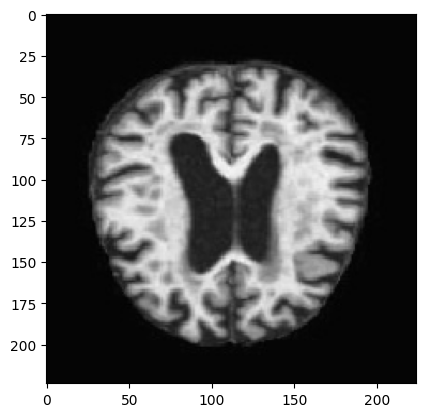

In [15]:
test_image_path='/content/drive/MyDrive/INTERNSHIP/AugmentedAlzheimer/MildDemented/bd76018e-97c5-44f2-9a77-8d96b8fac33a.jpg'
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [16]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array/=255

In [17]:
prediction = model.predict(img_array)
ind =np.argmax(prediction[0])
print(class_names[ind])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
MildDemented
